Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
2) Salary_hike -> Build a prediction model for Salary_hike

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [27]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\BHC228\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

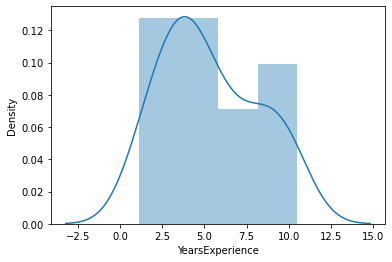

In [29]:
sns.distplot(data['YearsExperience'])

C:\Users\BHC228\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

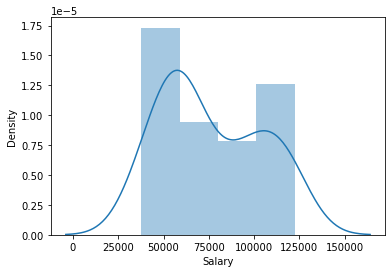

In [30]:
sns.distplot(data['Salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1237256db20>,
 'caps': [<matplotlib.lines.Line2D at 0x123719d1220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1237256d7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x123719d18e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x123719d1c40>],
 'means': []}

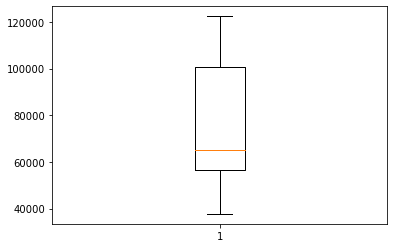

In [31]:
plt.boxplot(data.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x12371ac8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x12371adc190>,
 'boxes': [<matplotlib.lines.Line2D at 0x12371ac8730>],
 'medians': [<matplotlib.lines.Line2D at 0x12371adc7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12371adcb50>],
 'means': []}

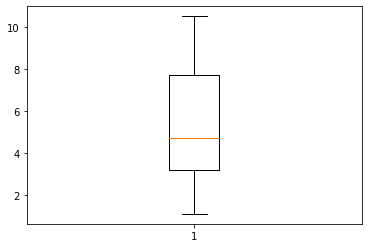

In [32]:
plt.boxplot(data.YearsExperience)


From above boxplots we can state that no outliers are present in the dataset

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

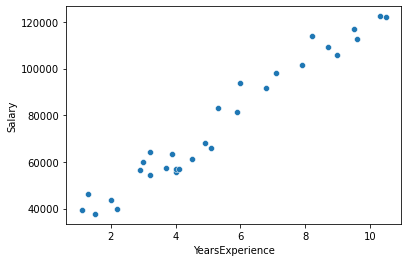

In [33]:
# scatterplot of input variable i.e., YearsExperience Vs. output variable i.e., Salary
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

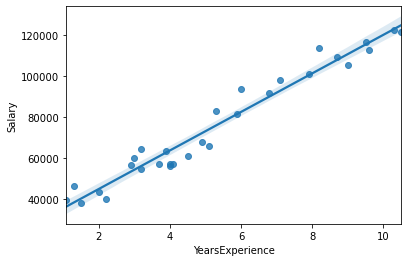

In [34]:
# scatterplot with regression line of input variable i.e.,YearsExperience Vs. output variable i.e., Salary
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [35]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Correlation coefficient value r = 0.978242 indicates that there is a strong correlation between independent variable and dependent variable

# Simple linear Regression Model

In [36]:
model = smf.ols('Salary ~ YearsExperience', data = data).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        16:23:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking predictions of Model by equation From the result Intercept Bo = 2.579e+04 and YearsExperience B1 = 9449.9623, 
so our linear regression equation will become Y = Bo + B1X 

Y = 2.579e+04 + 9449.9623*X

In [38]:
predicted_salary = model.predict(data.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data.Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


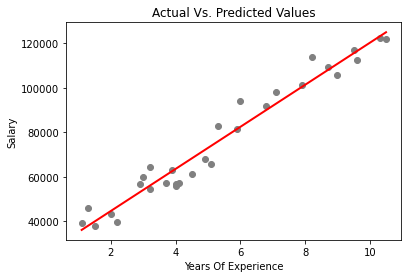

In [39]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.YearsExperience, data.Salary,  color='gray')
plt.plot(data.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [40]:
#Calculation of Errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data.Salary, predicted_salary))

Mean Absolute Error: 4644.20128944354
Mean Squared Error: 31270951.72228097
Root Mean Squared Error: 5592.043608760662
R^2 Score :           0.9569566641435086


p-value from the test: above 0.05 generally means normal: 0.4279759880058132
Residuals are normally distributed


C:\Users\BHC228\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


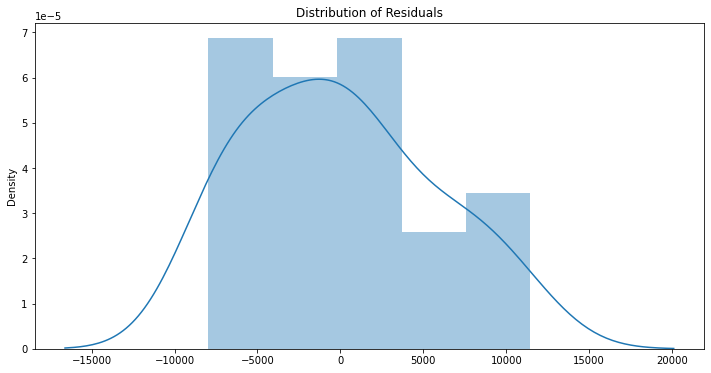

In [41]:
#Checking Normality of Residuals
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: above 0.05 generally means normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

# Building model with Logarithmic Transformation
Y = a + b * log(x)

In [42]:
# Preparing data for model building
data1 = pd.DataFrame.copy(data)
data1['log_YearsExperience'] = np.log(data1.YearsExperience)
data1

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457
5,2.9,56642.0,1.064711
6,3.0,60150.0,1.098612
7,3.2,54445.0,1.163151
8,3.2,64445.0,1.163151
9,3.7,57189.0,1.308333


In [43]:
# Building model
log_model = smf.ols('Salary ~ log_YearsExperience', data = data1).fit()

In [44]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.25e-13
Time:                        16:24:18   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking predictions of Model by equation From the result Intercept Bo = 1.493e+04 and log_YearsExperience B1 = 4.058e+04, 
so our linear regression equation will become Y = Bo + B1log(X) 

Y=1.493e+04 + 4.058e+04log(X)

In [45]:
predicted_salary = log_model.predict(data1.log_YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,39343.0,18795.848339
1,46205.0,25575.235192
2,37731.0,31382.551905
3,43525.0,43057.262306
4,39891.0,46925.138875
5,56642.0,58136.050079
6,60150.0,59511.842441
7,54445.0,62130.943929
8,64445.0,62130.943929
9,57189.0,68022.718504


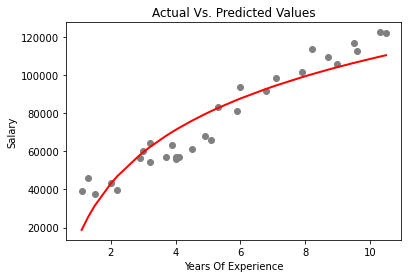

In [46]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [47]:
#Calculation of Errors
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.Salary, predicted_salary))

Mean Absolute Error: 8443.584664486354
Mean Squared Error: 106149618.72183882
Root Mean Squared Error: 10302.893706228306
R^2 Score :           0.8538888828756969


p-value from the test: above 0.05 generally means normal: 0.4374194094941122
Residuals are normally distributed


C:\Users\BHC228\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


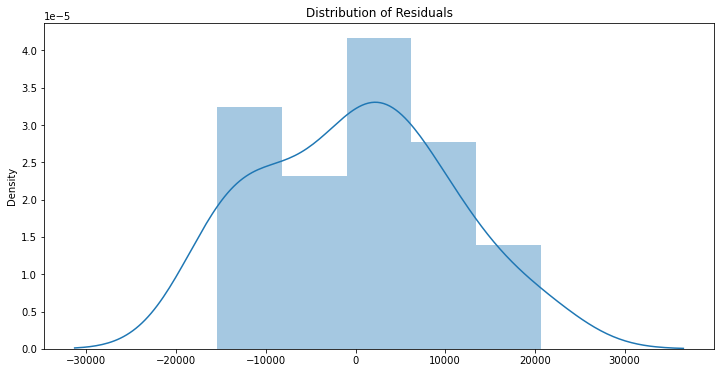

In [48]:
#Checking normality of residuals
residuals = data1.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: above 0.05 generally means normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)

plt.show()

# Building model with exponential transformation
log(Y) =α + βX + ε

In [49]:
# preparing data to build exponential model
data1['log_Salary'] = np.log(data1.Salary)
data1

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


In [50]:
# Building model
exp_model = smf.ols('log_Salary ~ YearsExperience', data = data1).fit()

In [51]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           7.03e-18
Time:                        16:24:39   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking predictions of Model by equation
From the result Intercept Bo = 10.5074 and YearsExperience B1 =0.1255, 
so our linear regression equation will become log(Y)= Bo+B1X+e

log(Y) = 10.5074 + 0.1255*X + e

In [52]:
predicted_salary = exp_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.log_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,10.580073,10.645400
1,10.740843,10.670491
2,10.538237,10.695581
3,10.681091,10.758308
4,10.593906,10.783398
5,10.944506,10.871215
6,11.004597,10.883761
7,10.904946,10.908851
8,11.073567,10.908851
9,10.954117,10.971578


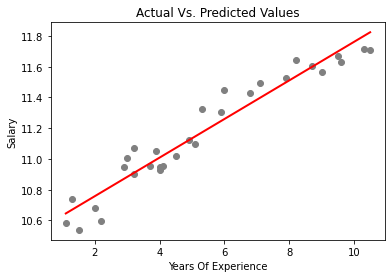

In [53]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.log_Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [54]:
#Calculation of Errors
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.log_Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.log_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.log_Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.log_Salary, predicted_salary))

Mean Absolute Error: 0.07981492426092197
Mean Squared Error: 0.008944311172030255
Root Mean Squared Error: 0.09457436847280691
R^2 Score :           0.9319671194084198


In [55]:
pred_df = pd.DataFrame({'Actual': np.exp(data1.log_Salary), 'Predicted': np.exp(predicted_salary)})
pred_df

,Actual,Predicted
0,39343.0,41998.957468
1,46205.0,43066.066794
2,37731.0,44160.289228
3,43525.0,47019.029189
4,39891.0,48213.688474
5,56642.0,52639.142472
6,60150.0,53303.675386
7,54445.0,54658.014935
8,64445.0,54658.014935
9,57189.0,58196.330788


p-value from the test: above 0.05 generally means normal: 0.3369861234986701
Residuals are normally distributed


C:\Users\BHC228\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


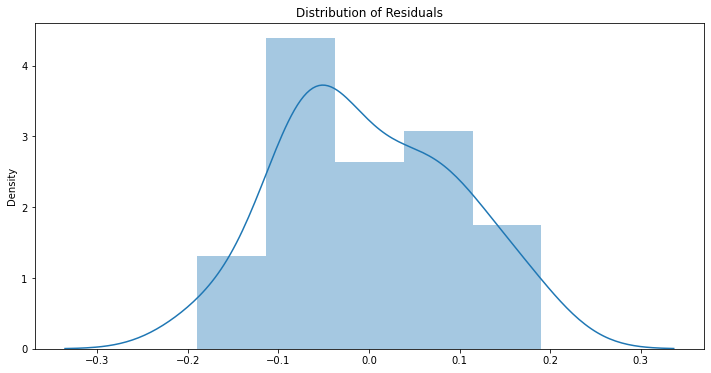

In [56]:
#Checking Normality of residuals
residuals = data1.log_Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: above 0.05 generally means normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

# Building model with square root transformation¶
√Y = a + b * X + e

In [57]:
# preparing data to build model
data1['sqrt_Salary'] = np.sqrt(data1.Salary)
data1

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,198.350700
1,1.3,46205.0,0.262364,10.740843,214.953483
2,1.5,37731.0,0.405465,10.538237,194.244691
3,2.0,43525.0,0.693147,10.681091,208.626460
4,2.2,39891.0,0.788457,10.593906,199.727314
5,2.9,56642.0,1.064711,10.944506,237.995798
6,3.0,60150.0,1.098612,11.004597,245.254969
7,3.2,54445.0,1.163151,10.904946,233.334524
8,3.2,64445.0,1.163151,11.073567,253.860198
9,3.7,57189.0,1.308333,10.954117,239.142217


In [58]:
# Building model
sqrt_model = smf.ols('sqrt_Salary ~ YearsExperience', data = data1).fit()

In [59]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           9.78e-20
Time:                        16:25:00   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking predictions of Model by equation
From the result Intercept Bo = 180.7002 and YearsExperience B1 = 17.0565, 
so our linear regression equation will become √Y = Bo + B1X + e

√Y = 180.7002 + 17.0565*X + e

In [60]:
predicted_salary = sqrt_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.sqrt_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,198.350700,199.462407
1,214.953483,202.873713
2,194.244691,206.285019
3,208.626460,214.813286
4,199.727314,218.224592
5,237.995798,230.164164
6,245.254969,231.869818
7,233.334524,235.281124
8,253.860198,235.281124
9,239.142217,243.809390


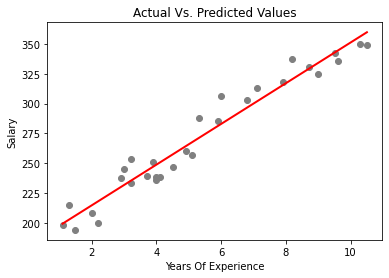

In [61]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.sqrt_Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [62]:
#Calculating Errors
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_Salary, predicted_salary))

Mean Absolute Error: 9.321657712741535
Mean Squared Error: 119.61845560327349
Root Mean Squared Error: 10.937022245715399
R^2 Score :           0.9498353533865289


In [63]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_Salary)**2, 'Predicted': (predicted_salary)**2})
pred_df

,Actual,Predicted
0,39343.0,39785.251671
1,46205.0,41157.743455
2,37731.0,42553.509262
3,43525.0,46144.747630
4,39891.0,47621.972517
5,56642.0,52975.542551
6,60150.0,53763.612294
7,54445.0,55357.207295
8,64445.0,55357.207295
9,57189.0,59443.018648


p-value from the test: above 0.05 generally means normal: 0.11907877807581112
Residuals are normally distributed


C:\Users\BHC228\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


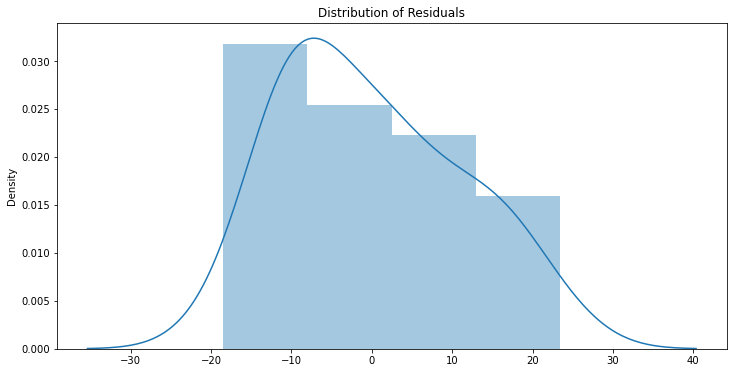

In [64]:
#Checking Normality of Residuals
residuals = data1.sqrt_Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: above 0.05 generally means normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

Conclusion


WE have found that while transforming the model, we have got various values for MAE, RMSE, MSE and R^2 Values. 


Simple linear Regression Model


Mean Absolute Error: 4644.20128944354
Mean Squared Error: 31270951.72228097
Root Mean Squared Error: 5592.043608760662
R^2 Score : 0.9569566641435086
    

        
Logrithm Transformation Model


Mean Absolute Error: 8443.584664486356
Mean Squared Error: 106149618.72183888
Root Mean Squared Error: 10302.893706228308
R^2 Score : 0.8538888828756968
    

    
    
Exponential Transformation Model


Mean Absolute Error: 0.07981492426092208
Mean Squared Error: 0.00894431117203029
Root Mean Squared Error: 0.0945743684728071
R^2 Score : 0.9319671194084195


    
Square-root Transformation Model


Mean Absolute Error: 9.321657712741537
Mean Squared Error: 119.61845560327352
Root Mean Squared Error: 10.937022245715399
R^2 Score : 0.9498353533865289
    
Simple linear regression model has highest R^2 value = 0.9569566641435086.
Therefore, Simple linear Regression Model is the best model among others.